<a href="https://colab.research.google.com/github/AntoniSopka97/Learn_ML_Keras/blob/main/ML_Keras_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd


#Generation and Prepare custom data
Экспериментальный преппарат был протестирован на лицах в возрасте от 10 до 100 лет.
1. В результате выборка составива 2100 человек из который половина была младше 65.
2. Около 95% пациентов в возрасте 65 лет и старше испытывали побочные эффекты.
3. Около 95% пациентов в возрасте до 65 лет не испытывали побочный эффектов

In [116]:
train_labels = [] # 0 - нет побочных эффектов 1 - есть побочные эффекты
train_samples = [] # возраст
test_labels = []
test_samples = []

In [117]:
#Генерация данных 
def data_gen(samples, labels):
  for i in range(50):
    # 5% молодых пациентов испытавшие побочные эффекты
    random_younger = randint(10,65)
    samples.append(random_younger)
    labels.append(1)

    # 5% пацентов в возрасте не испытавших побочных эффектов
    random_older= randint(65,100)
    samples.append(random_older)
    labels.append(0)

  for i in range(1000):
    # 95% молодых пациентов не испытавшие побочные эффекты
    random_younger = randint(10,65)
    samples.append(random_younger)
    labels.append(0)

    # 95% пацентов в возрасте испытавшие побочных эффектов
    random_older= randint(65,100)
    samples.append(random_older)
    labels.append(1)

  return samples, labels

In [118]:
train_samples, train_labels = data_gen(train_samples,train_labels)
test_samples, test_labels = data_gen(test_samples,test_labels)

In [119]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)


test_labels = np.array(train_labels)
test_samples = np.array(train_samples)
test_samples, test_labels = shuffle(test_samples, test_labels)

In [120]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))


# Простая модель прямого распространения (tf.kearas Sequential Model)

In [121]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [122]:
physical_device = tf.config.experimental.list_physical_devices('GPU')
print("Num GPU:", len(physical_device))
tf.config.experimental.set_memory_growth(physical_device[0], True)


Num GPU: 1


#Def Plots Visualizate

In [123]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('sparse_categorical_crossentropy')
  ax1.legend()
  
  ax1.grid(True)


  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()
  ax2.grid(True)



  plt.show()

In [150]:
def plot_conflusion_matrix(cm, classes, normalize =False, title = 'Confusion matrix', cmap = plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
  
  print(cm)

  thresh = cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, cm[i,j],
             horizontalalignment = "center",
             color = "white" if cm[i,j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.ylabel('Predicted label')

     



#Init Model

In [124]:
nn_model  = Sequential([
    Dense(units = 16, input_shape = (1,), activation='relu'),
    Dense(units = 32, activation='relu'),
    Dense(units = 2, activation='softmax')
])

In [125]:
#summary model
nn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                32        
                                                                 
 dense_10 (Dense)            (None, 32)                544       
                                                                 
 dense_11 (Dense)            (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [126]:
nn_model.compile(optimizer = Adam(learning_rate = 0.0001), loss ='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [137]:
history = nn_model.fit(
    x = scaled_train_samples,
    y = train_labels,
    batch_size = 128,
    epochs= 30,
    shuffle = True, 
    verbose = 2,
    validation_split=0.2
)

Epoch 1/30
14/14 - 0s - loss: 0.6120 - accuracy: 0.7167 - val_loss: 0.6074 - val_accuracy: 0.7214 - 108ms/epoch - 8ms/step
Epoch 2/30
14/14 - 0s - loss: 0.6093 - accuracy: 0.7167 - val_loss: 0.6046 - val_accuracy: 0.7214 - 68ms/epoch - 5ms/step
Epoch 3/30
14/14 - 0s - loss: 0.6066 - accuracy: 0.7268 - val_loss: 0.6018 - val_accuracy: 0.7381 - 62ms/epoch - 4ms/step
Epoch 4/30
14/14 - 0s - loss: 0.6039 - accuracy: 0.7274 - val_loss: 0.5990 - val_accuracy: 0.7381 - 59ms/epoch - 4ms/step
Epoch 5/30
14/14 - 0s - loss: 0.6011 - accuracy: 0.7292 - val_loss: 0.5962 - val_accuracy: 0.7524 - 59ms/epoch - 4ms/step
Epoch 6/30
14/14 - 0s - loss: 0.5984 - accuracy: 0.7345 - val_loss: 0.5933 - val_accuracy: 0.7524 - 58ms/epoch - 4ms/step
Epoch 7/30
14/14 - 0s - loss: 0.5956 - accuracy: 0.7345 - val_loss: 0.5905 - val_accuracy: 0.7524 - 59ms/epoch - 4ms/step
Epoch 8/30
14/14 - 0s - loss: 0.5928 - accuracy: 0.7351 - val_loss: 0.5877 - val_accuracy: 0.7595 - 89ms/epoch - 6ms/step
Epoch 9/30
14/14 - 0s -

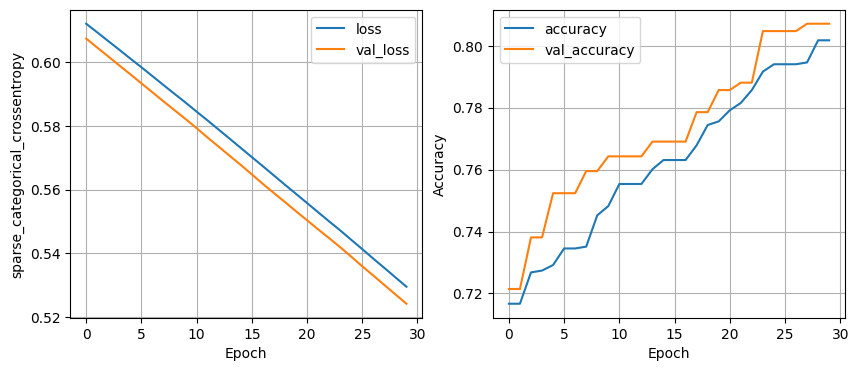

In [138]:
plot_history(history)

In [160]:
from sklearn.metrics import classification_report

def get_pred_report(model, x, test_y):
  predictions = nn_model.predict(x = x, batch_size= 32, verbose = 0)
  predictions = np.argmax(predictions, axis =-1)
  print(classification_report(predictions, test_labels))
  return predictions

In [161]:
from sklearn.metrics import confusion_matrix
import itertools

In [162]:
predictions = get_pred_report(nn_model,scaled_test_samples,test_labels)

              precision    recall  f1-score   support

           0       0.64      0.95      0.76       706
           1       0.97      0.73      0.83      1394

    accuracy                           0.80      2100
   macro avg       0.80      0.84      0.80      2100
weighted avg       0.86      0.80      0.81      2100



In [163]:
cm = confusion_matrix(y_true = test_labels, y_pred = predictions)

[[ 671  379]
 [  35 1015]]


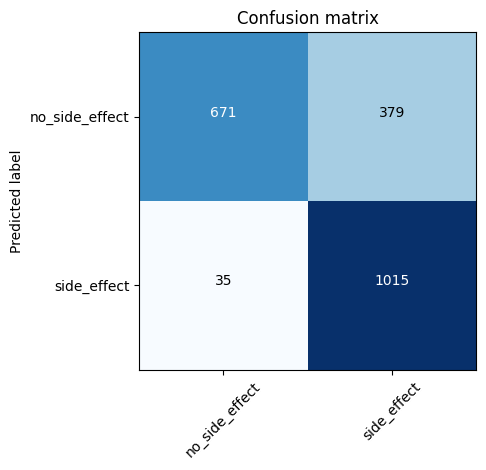

In [164]:
cm_plot_labels = ['no_side_effect', 'side_effect']
plot_conflusion_matrix(cm = cm, classes=cm_plot_labels)

#1.Save model







In [167]:
import os.path
from google.colab import drive
from keras.models import load_model

path = '/content/drive/MyDrive/Models/ML_Keras/Example_Random_Gen_Data/nn_model.h5'

nn_model.save(path)
new_model = load_model(path)
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                32        
                                                                 
 dense_10 (Dense)            (None, 32)                544       
                                                                 
 dense_11 (Dense)            (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [168]:
predictions = get_pred_report(new_model,scaled_test_samples,test_labels)

              precision    recall  f1-score   support

           0       0.64      0.95      0.76       706
           1       0.97      0.73      0.83      1394

    accuracy                           0.80      2100
   macro avg       0.80      0.84      0.80      2100
weighted avg       0.86      0.80      0.81      2100



#2.Save model to json / yaml



In [175]:
from keras.models import model_from_json
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Models/ML_Keras/Example_Random_Gen_Data/nn_model.js'

json_model_str = nn_model.to_json()

# upload
with open(path, 'w') as f:
  f.write(json_model_str)
# load
with open(path) as f:
  js_model = model_from_json(f.read())

js_model.summary()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                32        
                                                                 
 dense_10 (Dense)            (None, 32)                544       
                                                                 
 dense_11 (Dense)            (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


# Save weight

In [184]:
from keras.saving.legacy.save import load_weights
path = '/content/drive/MyDrive/Models/ML_Keras/Example_Random_Gen_Data/nn_model_weight.h5'

nn_model.save_weights(path)


In [186]:
# load weights and predict models
new_nn_model  = Sequential([
    Dense(units = 16, input_shape = (1,), activation='relu'),
    Dense(units = 32, activation='relu'),
    Dense(units = 2, activation='softmax')
])

new_nn_model.load_weights(filepath = path)
predictions = get_pred_report(new_nn_model,scaled_test_samples,test_labels)


              precision    recall  f1-score   support

           0       0.64      0.95      0.76       706
           1       0.97      0.73      0.83      1394

    accuracy                           0.80      2100
   macro avg       0.80      0.84      0.80      2100
weighted avg       0.86      0.80      0.81      2100

